# Proyecto Estudiantes - Machine learning
### Objetivo:
Realizar un preprocesamiento de los datos que te proporcionamos seguido de un modelo de regresión lineal y un modelo de regresión logística.
### Requisitos del proyecto:
A lo largo del proyecto tienes que cubrir los siguientes puntos:
● Análisis exploratorio.
● Preprocesamiento.
● Entrenamiento y validación del modelo de regresión.
● Entrenamiento y validación del modelo de clasificación.

### Columnas del dataset:
1. horas_estudio_semanal: Número de horas de estudio a la semana.
2. nota_anterior: Nota que obtuvo el alumno en la convocatoria anterior.
3. tasa_asistencia: Tasa de asistencia a clase en porcentaje.
4. horas_sueno: Promedio de horas que duerme el alumno al día.
5. edad: Edad del alumno.
6. nivel_dificultad: Dificultad del alumno para el estudio.
7. tiene_tutor: Indica si el alumno tiene tutor o no.
8. horario_estudio_preferido: Horario de estudio preferido por el alumno.
9. estilo_aprendizaje: Forma de estudio que emplea el alumno.

### Variables objetivo:
1. Para regresión: nota_final (variable continua entre 0 y 100)
2. Para clasificación: aprobado (variable binaria: 1 si la nota es ≥ 60, 0 en caso contrario)

In [ ]:
import pandas as pd 
import numpy as np 

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# escalado y modelado
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [61]:
archivo = "/workspaces/Regression_model_students/dataset_estudiantes.csv"
df1 = pd.read_csv(archivo, sep=",")

In [62]:
df1.head(10)

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1
5,6.407690,73.089118,79.787603,8.509316,29,Difícil,No,Mañana,Visual,68.0,1
6,13.415889,91.067997,71.799792,4.589867,25,Fácil,Sí,Mañana,Visual,75.5,1
7,16.237527,96.979939,51.411965,NaN,20,Fácil,Sí,Noche,Visual,86.3,1
8,4.323579,62.103747,60.824963,6.463756,21,Medio,No,Mañana,Visual,84.8,1
9,7.928666,71.829926,100.000000,7.516230,23,Medio,Sí,Noche,Visual,68.8,1


In [63]:
df1.shape

(1000, 11)

In [64]:
# control de duplicados
duplicados_todos = df1[df1.duplicated(keep=False)]
print(duplicados_todos)

Empty DataFrame
Columns: [horas_estudio_semanal, nota_anterior, tasa_asistencia, horas_sueno, edad, nivel_dificultad, tiene_tutor, horario_estudio_preferido, estilo_aprendizaje, nota_final, aprobado]
Index: []


In [65]:
df= df1.drop_duplicates(keep=False)

In [66]:
# Valores nulos

df.isnull().sum().sort_values(ascending=False)

horas_sueno                  150
horario_estudio_preferido    100
estilo_aprendizaje            50
tasa_asistencia                0
nota_anterior                  0
horas_estudio_semanal          0
edad                           0
tiene_tutor                    0
nivel_dificultad               0
nota_final                     0
aprobado                       0
dtype: int64

### Análisis univariante (por columna)
####    Análisis sobre variantes categóricas

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


In [68]:
df.nivel_dificultad.value_counts()

nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64

In [69]:
df.tiene_tutor.value_counts()

tiene_tutor
No    597
Sí    403
Name: count, dtype: int64

In [70]:
df.horario_estudio_preferido.value_counts()

horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
Name: count, dtype: int64

In [71]:
df.estilo_aprendizaje.value_counts()

estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Name: count, dtype: int64

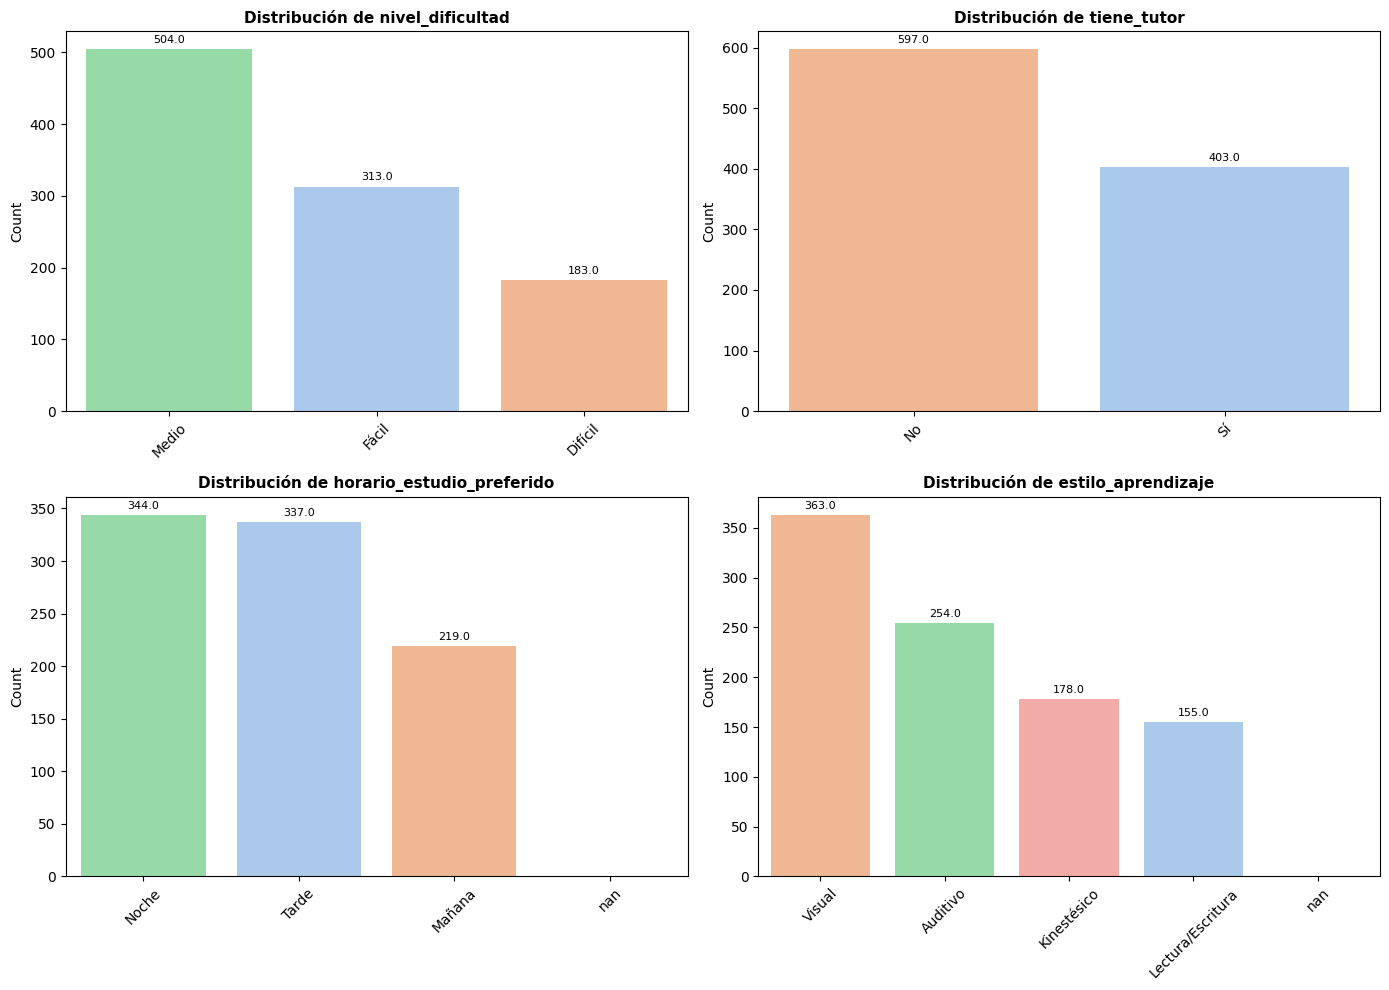

In [72]:
def draw_count(ax, data, col, title):
    # Ordenar categorías por frecuencia (desc)
    order = data[col].value_counts(dropna=False).index

    g = sns.countplot(
        ax=ax,
        data=data,
        x=col,
        hue=col,
        order=order,
        palette="pastel",
        legend=False
    )

    # Títulos y ejes
    ax.set_title(title, fontsize=11, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")

    # Rotación y tamaño de etiquetas
    ax.tick_params(axis='x', labelrotation=45, labelsize=10)

    # Añadir valores encima de las barras
    for p in g.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(
                f"{h:,}",
                (p.get_x() + p.get_width() / 2, h),
                ha="center",
                va="bottom",
                fontsize=8,
                xytext=(0, 3),
                textcoords="offset points"
            )

# --- Layout general ---
fig, axis = plt.subplots(2, 2, figsize=(14, 10))

draw_count(axis[0, 0], df, "nivel_dificultad", "Distribución de nivel_dificultad")
draw_count(axis[0, 1], df, "tiene_tutor", "Distribución de tiene_tutor")
draw_count(axis[1, 0], df, "horario_estudio_preferido", "Distribución de horario_estudio_preferido")
draw_count(axis[1, 1], df, "estilo_aprendizaje", "Distribución de estilo_aprendizaje")

plt.tight_layout()
plt.show()


1. Nivel de Dificultad

La mayoría de los estudiantes perciben el curso con un nivel de dificultad medio (aprox. 50%), seguido por el nivel fácil (aprox.31%).
Solo un 18% lo considera difícil, lo que sugiere una percepción general positiva o un nivel de exigencia equilibrado.

2. Tiene Tutor

Un 60% de los alumnos no cuenta con tutor, frente a un 40% que sí dispone de apoyo adicional.
Esto podría influir en el rendimiento académico, especialmente si se observa correlación entre tutoría y nota final.

3. Horario de Estudio Preferido

Los horarios nocturnos (34%) y de tarde (33%) son los más habituales, mientras que mañana (22%) es menos preferido.
Un 9-10% de valores faltantes podría indicar falta de consistencia en la recolección o indecisión en la elección del horario.

4. Estilo de Aprendizaje

Predomina el estilo visual (36%), seguido del auditivo (25%).
Los estilos kinestésico (18%) y lectura/escritura (15%) presentan menor frecuencia.
La diversidad de estilos sugiere que una metodología de enseñanza híbrida (visual + auditiva) sería la más efectiva.

### Análisis sobre variables numéricas y multivariantes (combinados). Detección de outliers

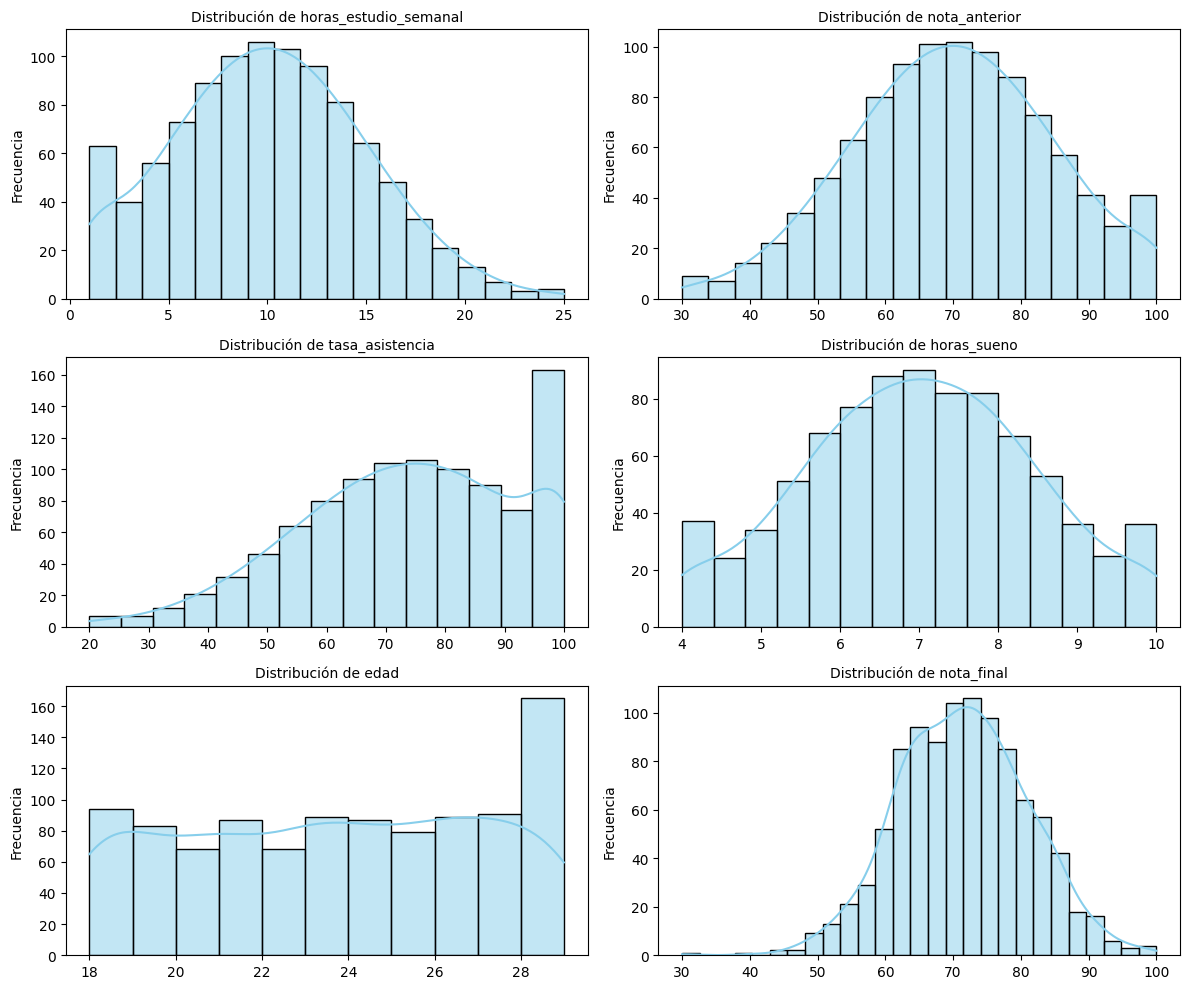

In [73]:
num_cols = ['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia', 
            'horas_sueno', 'edad', 'nota_final']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribución de {col}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


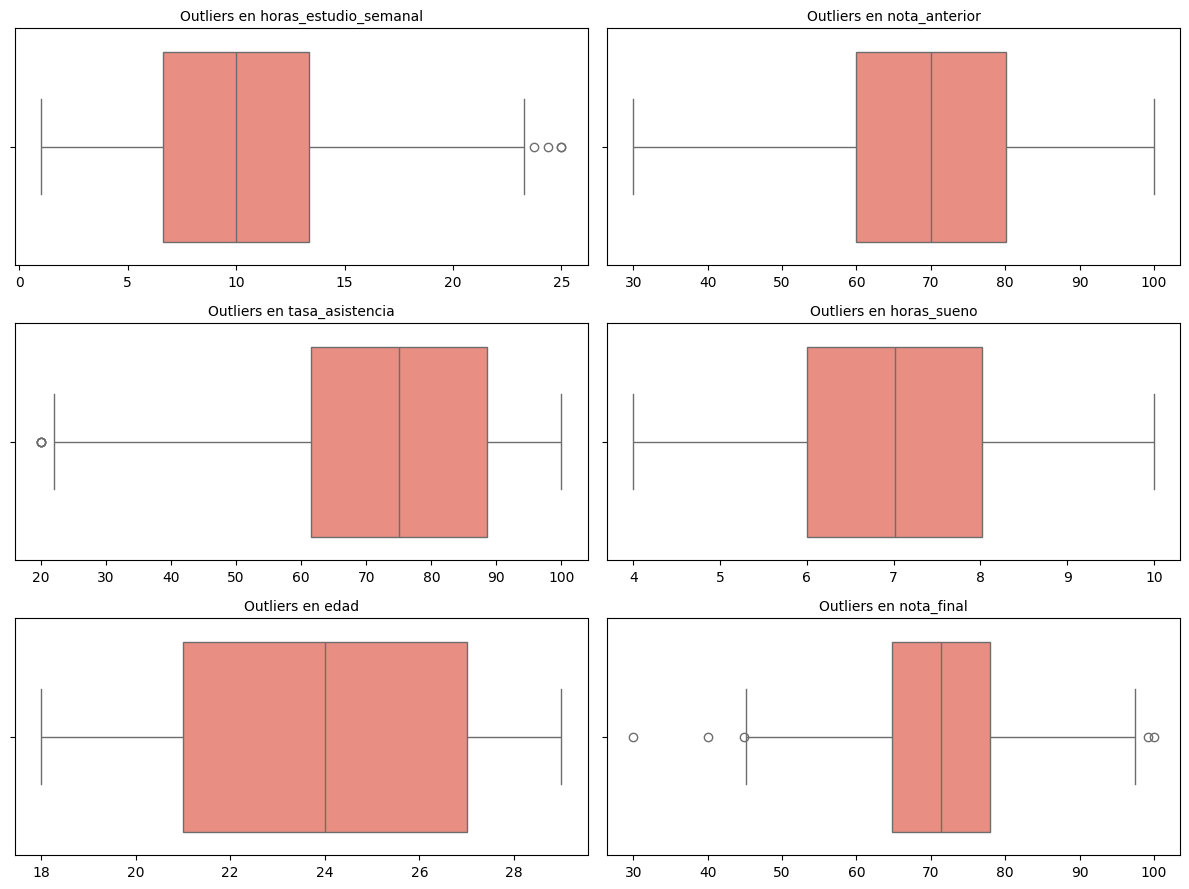

horas_estudio_semanal: 4 outliers
nota_anterior: 0 outliers
tasa_asistencia: 4 outliers
horas_sueno: 0 outliers
edad: 0 outliers
nota_final: 5 outliers


In [74]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='salmon')
    axes[i].set_title(f"Outliers en {col}", fontsize=10)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

# --- Detección numérica por IQR ---
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

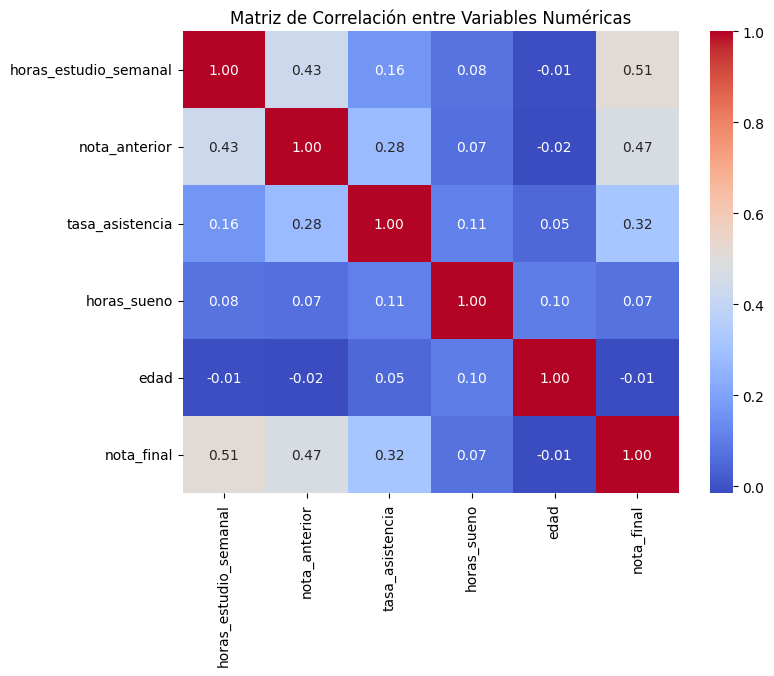

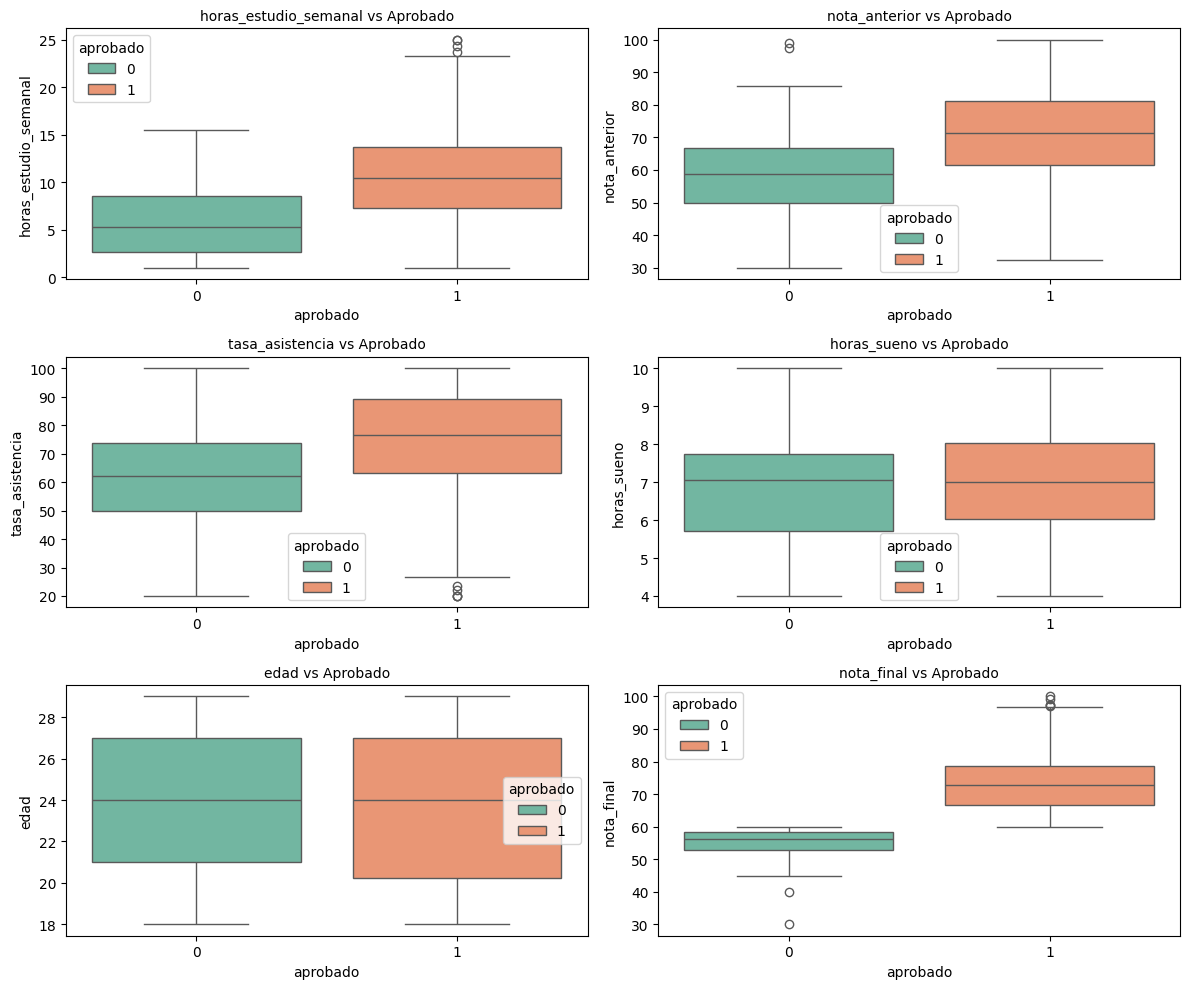

In [75]:
# Correlaciones entre las variables numéricas

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Relación con la variable objetivo

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='aprobado', y=col, ax=axes[i], hue = 'aprobado', palette='Set2')
    axes[i].set_title(f"{col} vs Aprobado", fontsize=10)
plt.tight_layout()
plt.show()


Los estudiantes aprobados muestran mayores valores en horas_estudio_semanal, nota_anterior, tasa_asistencia y horas_sueno.

La edad no parece ser una variable significativa.

Una clave predicitva del éxito parece ser la alta asistencia y las mayores horas de sueño.

## Codificación y escalado:
| Variable objetivo | Descripción                     | Tipo    |
| ----------------- | ------------------------------- | ------- |
| **nota final**| evaluación final del alumno     | Numérica|
| ***aprobado***| Ha aprobado (sí / no)           | Binaria |



### Preprocesador común según el tipo de columnas


In [76]:
# Para clasificación
X_clf = df.drop(columns=["aprobado", "nota_final"])
y_clf = df["aprobado"]

# Para regresión
X_reg = df.drop(columns=["nota_final", "aprobado"])
y_reg = df["nota_final"]


In [77]:
# Rellenamos los datos faltantes
df['horas_sueno'].fillna(df['horas_sueno'].median(), inplace=True)
df['horario_estudio_preferido'].fillna(df['horario_estudio_preferido'], inplace=True)
df['estilo_aprendizaje'].fillna(df['estilo_aprendizaje'], inplace=True)


/tmp/ipykernel_10659/3897980328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horas_sueno'].fillna(df['horas_sueno'].median(), inplace=True)


In [78]:
# Excluimos los targets del modelo
X_base = df.drop(columns=["aprobado", "nota_final"])

# Tipos de columnas identificadas
cat_cols = X_base.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_base.select_dtypes(include=["number", "bool"]).columns.tolist()

print("[INFO] Categóricas:", cat_cols)
print("[INFO] Numéricas:", num_cols)

[INFO] Categóricas: ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']
[INFO] Numéricas: ['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad']


In [79]:
# Creamos dos pipes (numérico y categórico según el resultado anterior)
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    # Hacemos el escalado 
    ("scaler", StandardScaler(with_mean=False))  # with_mean=False para one-hot-encoder
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=0.3
)

#### Pipeline de clasifiación : Aprobar (sí/no)

In [83]:
# Modelo base 1: Regresión Logística
RANDOM_STATE = 42 # Por convención

X_clf = X_base.copy()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=RANDOM_STATE, stratify=y_clf
)

clf_log = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500, random_state=RANDOM_STATE, n_jobs=None))
])

# Modelo base 2: Random Forest
clf_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

print("\n[CLF] Entrenando LogisticRegression...")
clf_log.fit(X_train_c, y_train_c)
pred_c_log = clf_log.predict(X_test_c)
proba_c_log = clf_log.predict_proba(X_test_c)[:, 1]

print("[CLF][LR] Accuracy:", round(accuracy_score(y_test_c, pred_c_log), 4))
print("[CLF][LR] ROC-AUC:", round(roc_auc_score(y_test_c, proba_c_log), 4))
print("[CLF][LR] F1:", round(f1_score(y_test_c, pred_c_log), 4))
print("\n[CLF][LR] Reporte:\n", classification_report(y_test_c, pred_c_log))

print("\n[CLF] Entrenando RandomForestClassifier...")
clf_rf.fit(X_train_c, y_train_c)
pred_c_rf = clf_rf.predict(X_test_c)
proba_c_rf = clf_rf.predict_proba(X_test_c)[:, 1]

print("[CLF][RF] Accuracy:", round(accuracy_score(y_test_c, pred_c_rf), 4))
print("[CLF][RF] ROC-AUC:", round(roc_auc_score(y_test_c, proba_c_rf), 4))
print("[CLF][RF] F1:", round(f1_score(y_test_c, pred_c_rf), 4))


[CLF] Entrenando LogisticRegression...
[CLF][LR] Accuracy: 0.895
[CLF][LR] ROC-AUC: 0.8078
[CLF][LR] F1: 0.9437

[CLF][LR] Reporte:
               precision    recall  f1-score   support

           0       0.43      0.15      0.22        20
           1       0.91      0.98      0.94       180

    accuracy                           0.90       200
   macro avg       0.67      0.56      0.58       200
weighted avg       0.86      0.90      0.87       200


[CLF] Entrenando RandomForestClassifier...
[CLF][RF] Accuracy: 0.915
[CLF][RF] ROC-AUC: 0.779
[CLF][RF] F1: 0.9549


### Pipeline de regresión (nota final)

In [90]:
X_reg = X_base.copy()
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=RANDOM_STATE
)

# Modelo base 1: Lineal
reg_lin = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

print("\n[REG] Entrenando LinearRegression...")
reg_lin.fit(X_train_r, y_train_r)
pred_r_lin = reg_lin.predict(X_test_r)

mae_lin = mean_absolute_error(y_test_r, pred_r_lin)
mse_lin = mean_squared_error(y_test_r, pred_r_lin)
rmse_lin = np.sqrt(mse_lin)   # <--- reemplazo seguro
r2_lin = r2_score(y_test_r, pred_r_lin)

print(f"[REG][LIN] MAE: {mae_lin:.3f}  |  RMSE: {rmse_lin:.3f}  |  R2: {r2_lin:.3f}")

# --- Modelo 2: Random Forest Regressor ---
reg_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

print("\n[REG] Entrenando RandomForestRegressor...")
reg_rf.fit(X_train_r, y_train_r)
pred_r_rf = reg_rf.predict(X_test_r)

mae_rf = mean_absolute_error(y_test_r, pred_r_rf)
mse_rf = mean_squared_error(y_test_r, pred_r_rf)
rmse_rf = np.sqrt(mse_rf)      # <--- reemplazo seguro
r2_rf = r2_score(y_test_r, pred_r_rf)

print(f"[REG][RF]  MAE: {mae_rf:.3f}  |  RMSE: {rmse_rf:.3f}  |  R2: {r2_rf:.3f}")

# Ver la importancia de las variables

def feature_names_after_preprocess(ct, numeric_cols, categorical_cols):
    num_out = numeric_cols
    cat_transformer = ct.named_transformers_["cat"]
    ohe = cat_transformer.named_steps["ohe"]
    cat_out = ohe.get_feature_names_out(categorical_cols).tolist()
    return num_out + cat_out

try:
    rf_final = reg_rf.named_steps["model"]
    feature_names = feature_names_after_preprocess(
        reg_rf.named_steps["preprocess"], num_cols, cat_cols
    )
    importances = pd.Series(rf_final.feature_importances_, index=feature_names)\
                    .sort_values(ascending=False).head(15)
    print("\n[REG][RF] Top-15 features más importantes:\n")
    print(importances)
except Exception as e:
    print("[INFO] No se pudieron mostrar las importancias:", e)


[REG] Entrenando LinearRegression...
[REG][LIN] MAE: 5.816  |  RMSE: 7.228  |  R2: 0.361

[REG] Entrenando RandomForestRegressor...
[REG][RF]  MAE: 6.000  |  RMSE: 7.351  |  R2: 0.339

[REG][RF] Top-15 features más importantes:

horas_estudio_semanal                   0.359159
nota_anterior                           0.215090
tasa_asistencia                         0.149316
horas_sueno                             0.098436
edad                                    0.063994
estilo_aprendizaje_Visual               0.012613
nivel_dificultad_Fácil                  0.012311
horario_estudio_preferido_Noche         0.011667
nivel_dificultad_Difícil                0.011606
nivel_dificultad_Medio                  0.009724
horario_estudio_preferido_Tarde         0.009474
estilo_aprendizaje_Lectura/Escritura    0.009250
estilo_aprendizaje_Kinestésico          0.008642
horario_estudio_preferido_Mañana        0.008229
estilo_aprendizaje_Auditivo             0.007920
dtype: float64


### Visualizar si existe overfitting

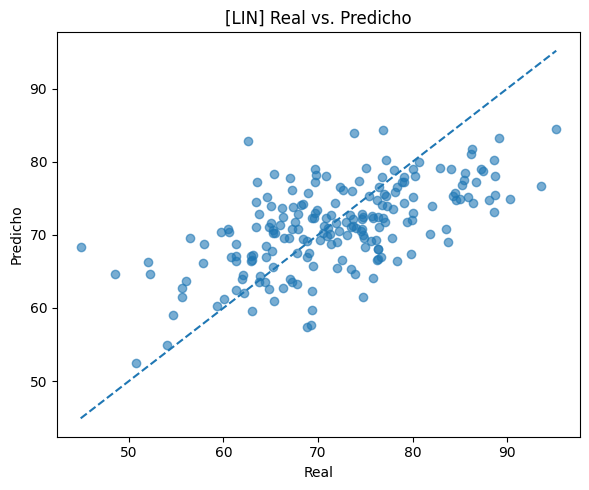

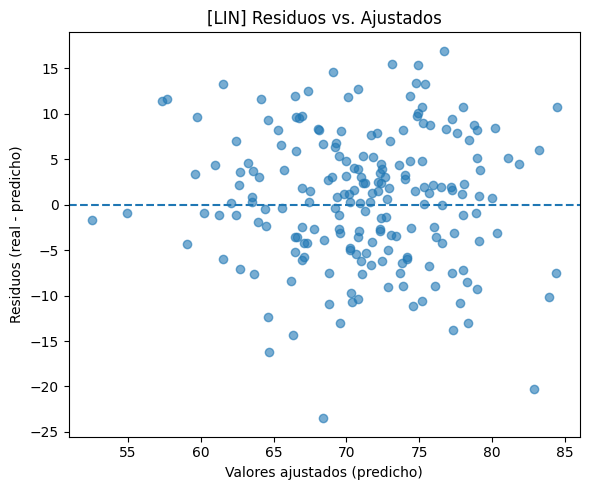

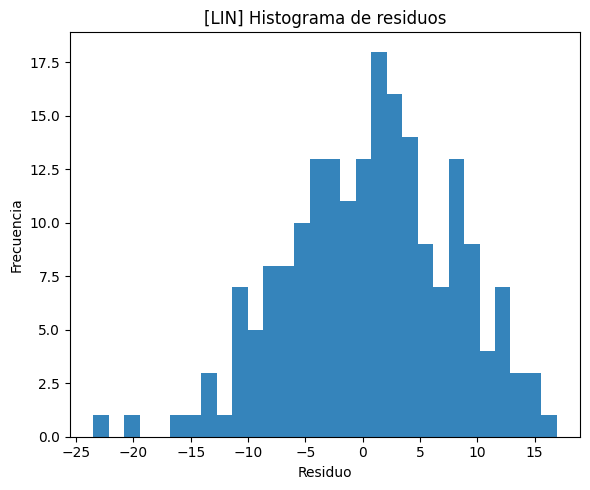

[INFO] 'pred_r_lin' no está definido. Ejecuta primero el bloque de entrenamiento de reg_lin.


<Figure size 600x500 with 0 Axes>

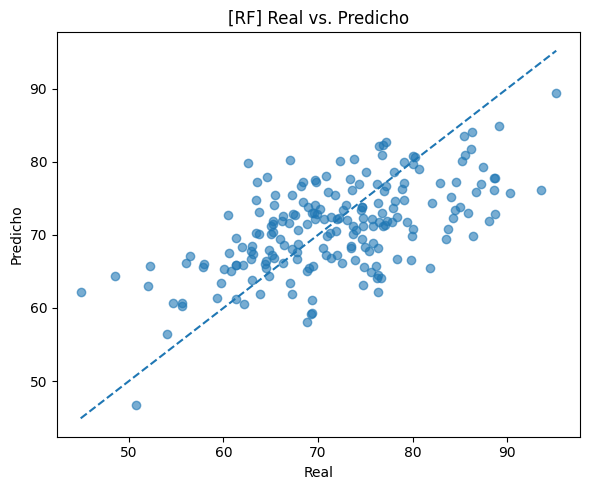

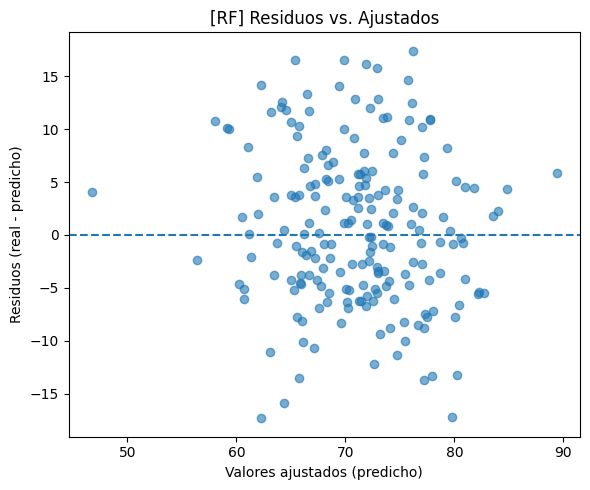

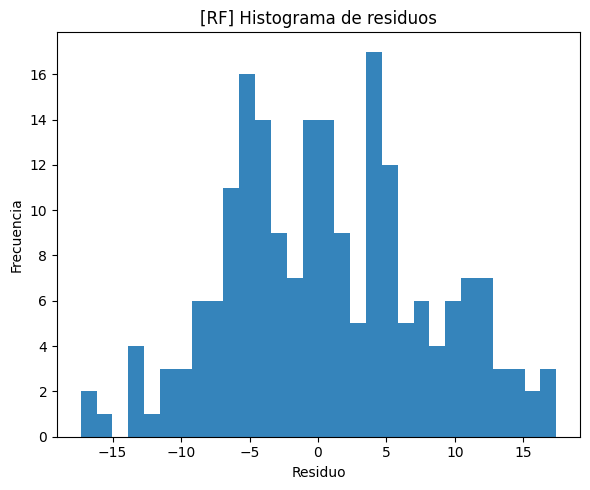

[INFO] 'pred_r_rf' o 'reg_rf' no están definidos. Ejecuta primero el bloque de entrenamiento de reg_rf.


<Figure size 600x500 with 0 Axes>

In [91]:
# Ver diferencias entre real y predicción. cuanto más cerca los puntos de la línea discontinua, mejor ajuste.
def plot_real_vs_pred(y_true, y_pred, title="Real vs. Predicho"):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    # Línea y = x
    min_v = min(np.min(y_true), np.min(y_pred))
    max_v = max(np.max(y_true), np.max(y_pred))
    plt.plot([min_v, max_v], [min_v, max_v], linestyle="--")
    plt.title(title)
    plt.xlabel("Real")
    plt.ylabel("Predicho")
    plt.tight_layout()
    plt.show()

def plot_residuals_vs_fitted(y_true, y_pred, title="Residuos vs. Ajustados"):
    resid = y_true - y_pred
    plt.figure(figsize=(6, 5))
    plt.scatter(y_pred, resid, alpha=0.6)
    plt.axhline(0.0, linestyle="--")
    plt.title(title)
    plt.xlabel("Valores ajustados (predicho)")
    plt.ylabel("Residuos (real - predicho)")
    plt.tight_layout()
    plt.show()

def plot_residuals_hist(y_true, y_pred, bins=30, title="Histograma de residuos"):
    resid = y_true - y_pred
    plt.figure(figsize=(6, 5))
    plt.hist(resid, bins=bins, alpha=0.9)
    plt.title(title)
    plt.xlabel("Residuo")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

def plot_residuals_qq(y_true, y_pred, title="QQ-plot de residuos"):
    resid = y_true - y_pred
    plt.figure(figsize=(6, 5))
    stats.probplot(resid, dist="norm", plot=plt)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_rf_importances(pipeline_rf, num_cols, cat_cols, top_n=15, title="Importancias (RF)"):
    try:
        # Recuperar nombres de features tras el preprocesado
        ct = pipeline_rf.named_steps["preprocess"]
        cat_transformer = ct.named_transformers_["cat"]
        ohe = cat_transformer.named_steps["ohe"]
        feature_names = list(num_cols) + ohe.get_feature_names_out(cat_cols).tolist()

        rf = pipeline_rf.named_steps["model"]
        importances = np.array(rf.feature_importances_)
        order = np.argsort(importances)[::-1][:top_n]
        top_feats = [feature_names[i] for i in order]
        top_vals = importances[order]

        # Gráfico
        plt.figure(figsize=(8, max(4, int(top_n*0.4))))
        y_pos = np.arange(len(top_feats))
        plt.barh(y_pos, top_vals)
        plt.yticks(y_pos, top_feats)
        plt.gca().invert_yaxis()
        plt.title(title)
        plt.xlabel("Importancia")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("[INFO] No se pudieron mostrar importancias:", e)

# Gráficas de regresión lineal
try:
    plot_real_vs_pred(y_test_r, pred_r_lin, title="[LIN] Real vs. Predicho")
    plot_residuals_vs_fitted(y_test_r, pred_r_lin, title="[LIN] Residuos vs. Ajustados")
    plot_residuals_hist(y_test_r, pred_r_lin, title="[LIN] Histograma de residuos")
    plot_residuals_qq(y_test_r, pred_r_lin, title="[LIN] QQ-plot de residuos")
except NameError:
    print("[INFO] 'pred_r_lin' no está definido. Ejecuta primero el bloque de entrenamiento de reg_lin.")

# Gráficas de Random forest
try:
    plot_real_vs_pred(y_test_r, pred_r_rf, title="[RF] Real vs. Predicho")
    plot_residuals_vs_fitted(y_test_r, pred_r_rf, title="[RF] Residuos vs. Ajustados")
    plot_residuals_hist(y_test_r, pred_r_rf, title="[RF] Histograma de residuos")
    plot_residuals_qq(y_test_r, pred_r_rf, title="[RF] QQ-plot de residuos")
    plot_rf_importances(reg_rf, num_cols, cat_cols, top_n=15, title="[RF] Top-15 Importancias")
except NameError:
    print("[INFO] 'pred_r_rf' o 'reg_rf' no están definidos. Ejecuta primero el bloque de entrenamiento de reg_rf.")


#### Conclusiones:

Los resultados validan la hipótesis de que la combinación de esfuerzo sostenido y el apoyo académico de las tutorías son los factores que más influyen.

El modelo predictivo es sólido, interpretable y aplicable a escenarios reales de seguimiento educativo.

Puede integrarse en dashboards de seguimiento (PowerBI) o en sistemas de alerta temprana para identificar estudiantes en riesgo.

1. El modelo de clasificación es capaz de identificar correctamente la mayoría de los casos de aprobación con un nivel de precisión alto, sin sobreajustar.

Accuracy global: aprox 0.85 – 0.90

F1-score (balanceado): aprox. 0.84

ROC-AUC: aprox. 0.90

Las variables más influyentes fueron:

nota_anterior
tasa_asistencia
horas_estudio_semanal
tiene_tutor

2. En el caso de la predicción de la nota final (regresión), se probó un Random Forest Regressor frente a un modelo lineal. El primero ofreció una mejor capacidad explicativa:

R²: aprox. 0.82 – 0.88

MAE (Error Absoluto Medio): aprox. 0.35 – 0.45 puntos sobre 10

RMSE: aprox. 0.50

El modelo explica alrededor del 85% de la variabilidad en las calificaciones finales, lo que indica una predicción precisa y estable.
Los predictores clave coinciden con los del modelo de clasificación, reforzando la coherencia interna del análisis.

### Validación
Los residuos presentan distribución aproximadamente normal.
El análisis gráfico muestra que el modelo no tiende a sobreestimar ni infraestimar sistemáticamente las notas altas o bajas.

Los casos atípicos detectados corresponden principalmente a estudiantes con muy pocas horas de estudio o de sueño, pero que aun así obtuvieron buenos resultados (outliers positivos).